In [42]:
import pandas as pd
import numpy as np
import pickle
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters

In [33]:
df = pd.read_csv('./csv-data/test.csv')

df 

,Date and Time,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Tue Mar 29 12:32:50 2022,1,1655,30812
1,Tue Mar 29 12:32:52 2022,2,1655,30812
2,Tue Mar 29 12:32:54 2022,3,1655,30812
3,Tue Mar 29 12:32:56 2022,4,1653,30812
4,Tue Mar 29 12:32:58 2022,5,1653,30812
...,...,...,...,...
786,Tue Mar 29 12:56:44 2022,787,1861,30625
787,Tue Mar 29 12:56:46 2022,788,1855,30625
788,Tue Mar 29 12:56:48 2022,789,1863,30687
789,Tue Mar 29 12:56:49 2022,790,1865,30625


In [34]:
df.columns = ['time','sample_no', 'Voltage','Temperature']
df['Voltage'] = df['Voltage']/460
df['Temperature'] = df['Temperature']/1000
df['current'] = 1.8
df['power'] = df['Voltage']*df['current']
df

,time,sample_no,Voltage,Temperature,current,power
0,Tue Mar 29 12:32:50 2022,1,3.597826,30.812,1.8,6.476087
1,Tue Mar 29 12:32:52 2022,2,3.597826,30.812,1.8,6.476087
2,Tue Mar 29 12:32:54 2022,3,3.597826,30.812,1.8,6.476087
3,Tue Mar 29 12:32:56 2022,4,3.593478,30.812,1.8,6.468261
4,Tue Mar 29 12:32:58 2022,5,3.593478,30.812,1.8,6.468261
...,...,...,...,...,...,...
786,Tue Mar 29 12:56:44 2022,787,4.045652,30.625,1.8,7.282174
787,Tue Mar 29 12:56:46 2022,788,4.032609,30.625,1.8,7.258696
788,Tue Mar 29 12:56:48 2022,789,4.050000,30.687,1.8,7.290000
789,Tue Mar 29 12:56:49 2022,790,4.054348,30.625,1.8,7.297826


<AxesSubplot:>

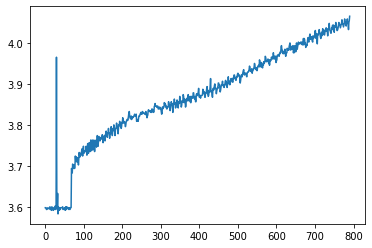

In [43]:
df['Voltage'].plot()

<AxesSubplot:>

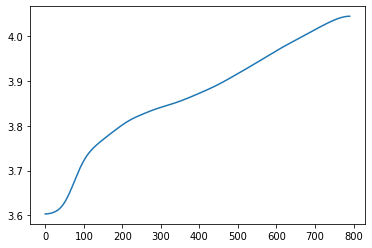

In [44]:
df['Voltage_smooth'] = filters.gaussian_filter1d(df['Voltage'],sigma=25)
df['Voltage_smooth'].plot()

In [45]:
features = ['Voltage_smooth','current','power','Temperature']
X = df[features]
X.values[0]

array([ 3.60312802,  1.8       ,  6.47608696, 30.812     ])

In [46]:
X.values[0].reshape(1,4)

array([[ 3.60312802,  1.8       ,  6.47608696, 30.812     ]])

In [47]:
model = pickle.load(open('model.pkl', 'rb'))


In [48]:
y_test = model.predict(X.values)

C:\Users\Hp\PycharmProjects\pypart2\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
SoC = y_test*100

In [59]:
time = np.arange(0, len(SoC)*2,2).tolist()

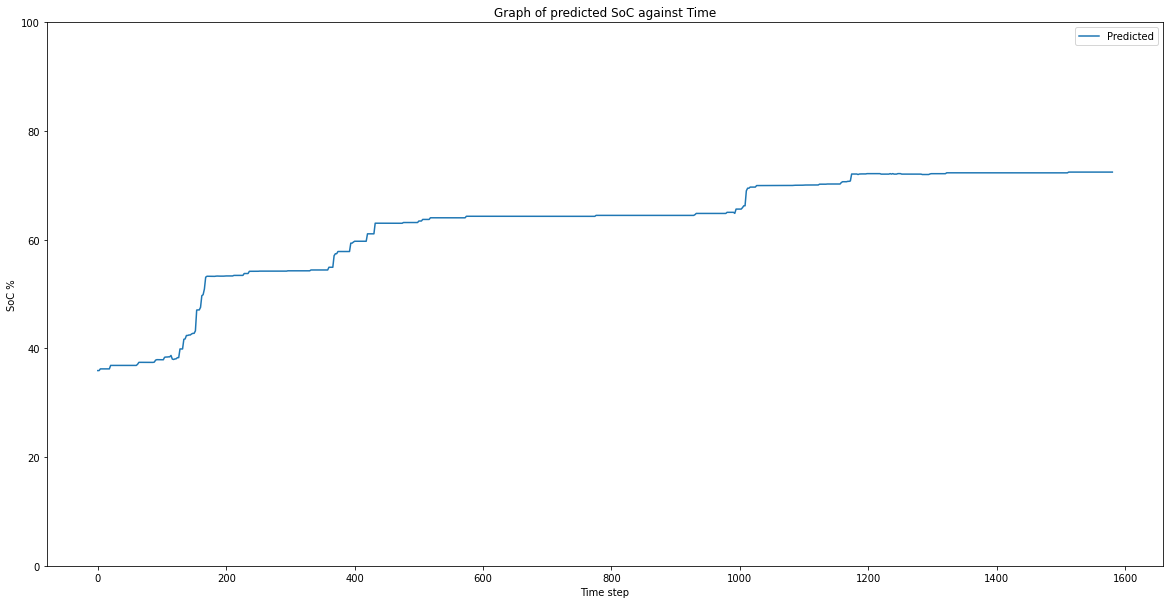

In [60]:
plt.figure(figsize=(20, 10))

plt.plot(time,SoC, label='Predicted')

plt.title('Graph of predicted SoC against Time')
plt.xlabel('Time (sec)')
plt.ylabel('SoC %')
plt.ylim((0,100))
# plt.xticks(np.linspace(min(y), max(y)), )
plt.legend()

plt.show()